In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(

    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE), 
    batch_size= BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [5]:
len(dataset)

141

In [6]:
141*32


4512

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[0 1 2 0 1 0 1 1 0 1 1 1 0 1 1 1 1 2 0 1 2 1 2 0 2 1 1 1 2 0 0 0]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
 

tf.Tensor(
[[[126. 117. 122.]
  [130. 121. 126.]
  [128. 119. 124.]
  ...
  [157. 147. 155.]
  [173. 163. 171.]
  [150. 140. 148.]]

 [[134. 125. 130.]
  [143. 134. 139.]
  [133. 124. 129.]
  ...
  [139. 129. 137.]
  [143. 133. 141.]
  [125. 115. 123.]]

 [[123. 114. 119.]
  [141. 132. 137.]
  [127. 118. 123.]
  ...
  [138. 128. 136.]
  [132. 122. 130.]
  [124. 114. 122.]]

 ...

 [[126. 117. 122.]
  [117. 108. 113.]
  [102.  93.  98.]
  ...
  [103.  94.  99.]
  [109. 100. 105.]
  [103.  94.  99.]]

 [[118. 109. 114.]
  [120. 111. 116.]
  [107.  98. 103.]
  ...
  [108.  99. 104.]
  [115. 106. 111.]
  [112. 103. 108.]]

 [[106.  97. 102.]
  [121. 112. 117.]
  [113. 104. 109.]
  ...
  [ 99.  90.  95.]
  [107.  98. 103.]
  [106.  97. 102.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
 

[[[126. 117. 120.]
  [127. 118. 121.]
  [131. 122. 125.]
  ...
  [146. 137. 140.]
  [146. 137. 140.]
  [146. 137. 140.]]

 [[117. 108. 111.]
  [119. 110. 113.]
  [125. 116. 119.]
  ...
  [149. 140. 143.]
  [149. 140. 143.]
  [149. 140. 143.]]

 [[127. 118. 121.]
  [126. 117. 120.]
  [129. 120. 123.]
  ...
  [150. 141. 144.]
  [152. 143. 146.]
  [152. 143. 146.]]

 ...

 [[ 61.  56.  60.]
  [ 63.  58.  62.]
  [ 63.  58.  62.]
  ...
  [100.  94.  96.]
  [100.  94.  96.]
  [ 98.  92.  94.]]

 [[ 59.  54.  58.]
  [ 63.  58.  62.]
  [ 62.  57.  61.]
  ...
  [ 98.  92.  94.]
  [103.  97.  99.]
  [105.  99. 101.]]

 [[ 63.  58.  62.]
  [ 67.  62.  66.]
  [ 65.  60.  64.]
  ...
  [102.  96.  98.]
  [112. 106. 108.]
  [118. 112. 114.]]]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
 

(256, 256, 3)


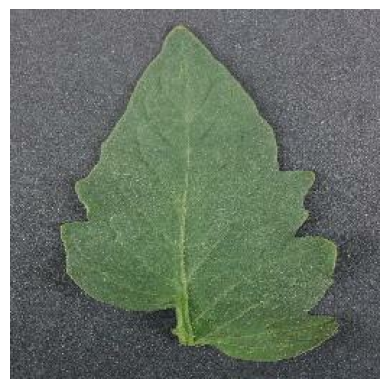

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis('off')
 

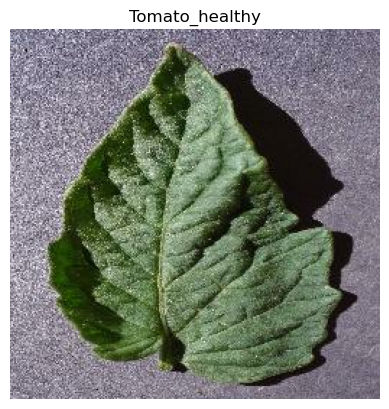

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')
 

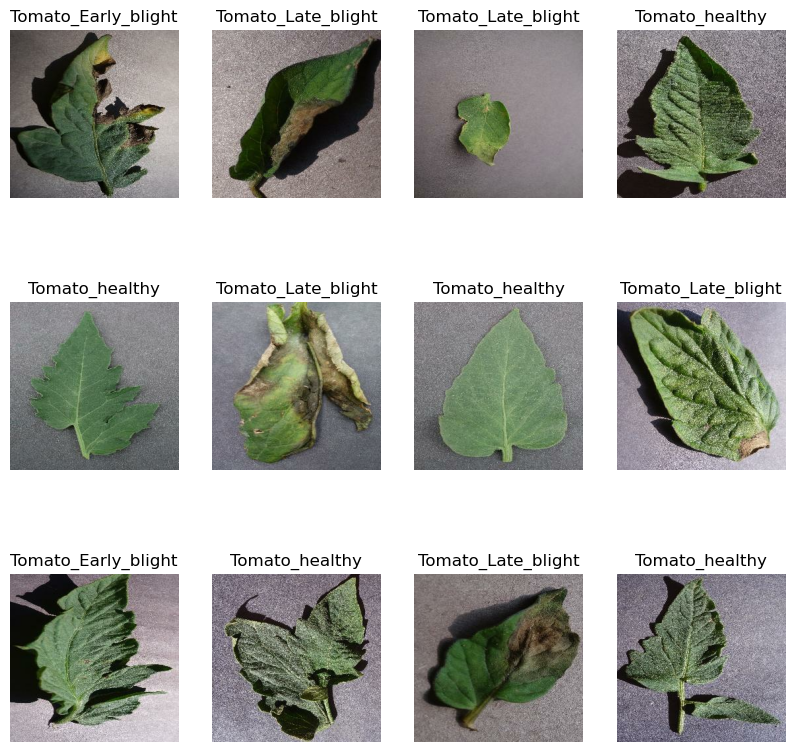

In [13]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
 

In [14]:
len(dataset)

141

In [15]:
80% ==> training 
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (937673030.py, line 1)

In [16]:
train_size = 0.8
len(dataset)*train_size

112.80000000000001

In [17]:
test_ds=dataset.skip(112)
len(test_ds)

29

In [18]:
val_size =0.1
len(dataset)*val_size

14.100000000000001

In [19]:
val_ds = test_ds.take(14)
len(val_ds)

14

In [20]:
test_ds = test_ds.skip(14)
len(test_ds)

15

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,
                             shuffle=True, shuffle_size =10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds= ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    return train_ds, val_ds, test_ds 


In [22]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

112

In [24]:
len(val_ds)

14

In [25]:
len(test_ds)

15

In [26]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])

In [28]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])


In [29]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3


model =models.Sequential([

    resize_and_rescaling,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

    layers.Flatten(), 
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])

model.build(input_shape=input_shape)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(

optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [33]:
history = model.fit(

    train_ds, 
    epochs=EPOCHS, 
    batch_size =BATCH_SIZE,
    verbose=1, 
    validation_data=val_ds
)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.4429 - loss: 1.0208 - val_accuracy: 0.6473 - val_loss: 0.7442
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 103s 898ms/step - accuracy: 0.6675 - loss: 0.7472 - val_accuracy: 0.7746 - val_loss: 0.5272
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 93s 830ms/step - accuracy: 0.8292 - loss: 0.4033 - val_accuracy: 0.8058 - val_loss: 0.4259
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8666 - loss: 0.3332 - val_accuracy: 0.7411 - val_loss: 0.6029
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 102s 914ms/step - accuracy: 0.8555 - loss: 0.3599 - val_accuracy: 0.7723 - val_loss: 0.6185
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 97s 867ms/step - accuracy: 0.8925 - loss: 0.2630 - val_accuracy: 0.8371 - val_loss: 0.3469
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 103s 923ms/step - accuracy: 0.8843 - loss: 0.2795 - val_accuracy: 0.7411 - val_loss: 0.5072
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8773 - loss: 0.29

In [35]:
scores = model.evaluate(test_ds)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.9855 - loss: 0.0548


In [36]:
scores

[0.069227434694767, 0.9791666865348816]

In [37]:
history

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

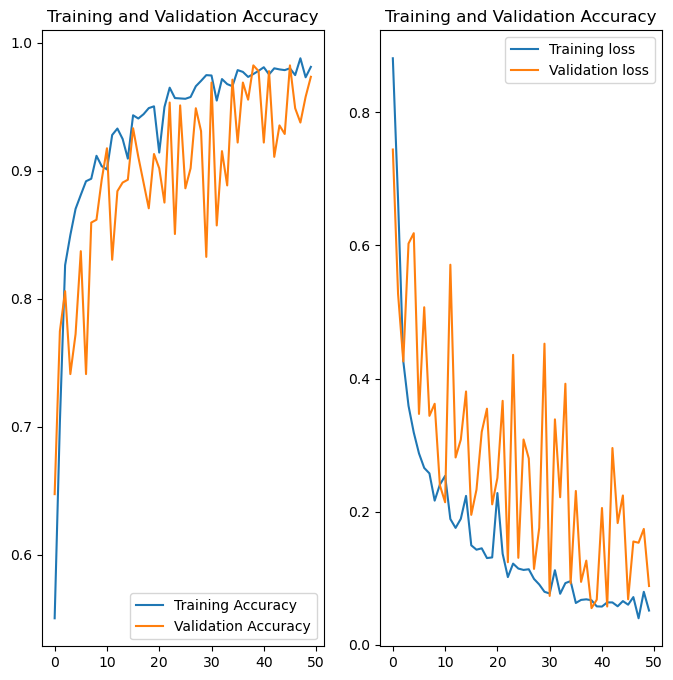

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")

plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = "Training loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation loss")

plt.legend(loc = 'upper right')
plt.title("Training and Validation Accuracy")

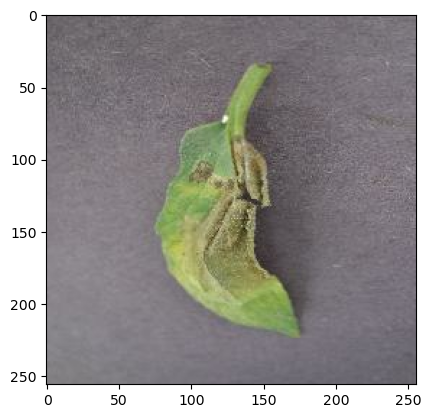

In [48]:
for image_batch, label_batch in test_ds.take(1):

    plt.imshow(image_batch[0].numpy().astype("uint8"))





first iamge to predict
first iamge's actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
predicted label: Tomato_Early_blight


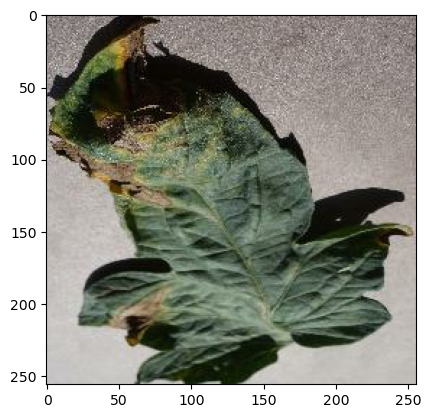

In [62]:
import numpy as np 
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]

    print("first iamge to predict")
    plt.imshow(first_image)

    print("first iamge's actual label:",class_names[ first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

Write a function for inference

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


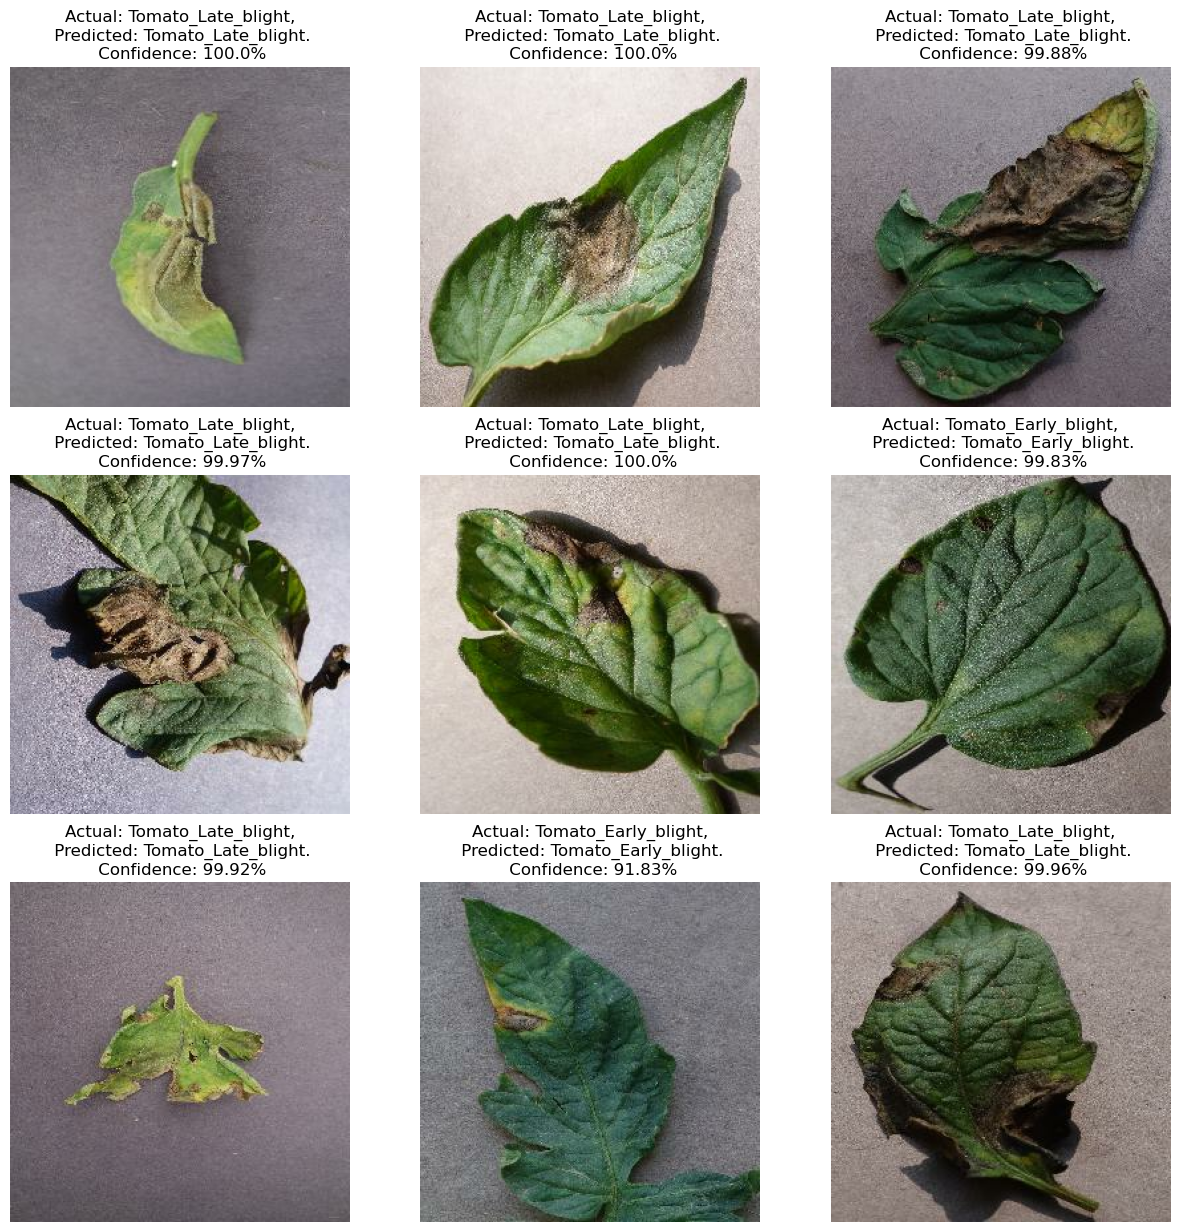

In [64]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

Saving the Model